## Calibration Plots
 - Calibration is a a post-processing technique used to improve a model by comparing the actual output and the expected. This means the dsitribution and behavior of the probability predicted should be like that of the actual training data.

 - One reason why calibration plots are essential when training a machine learning model is because many ML techniques are good in overrall results but with poor distribution assessment of the error.
 - Calibration curves therefore help error is distributed and how well probability estimations are made.

In [4]:
#importing packages needed
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
plt.rcParams["figure.figsize"] = (8,6)

In [2]:
data = pd.read_csv('..\..\datasets\defaults.csv')
data.head()

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


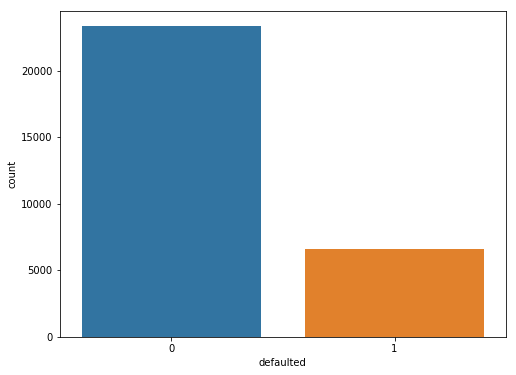

In [5]:
# Frequency count for the 0 and 1 classes of the target.
sns.countplot('defaulted',data=data)
plt.show()

### Training and testing the models.
- After training and testing three models on this dataset, the models with high accuracies that could further be considered as the best fit for this data are:
 **Logistic Regression with L1 regularization**  
 **Decision Tree with hyperparameter tuning**   

In [6]:
# Logistic regression with L1 regularization imported from sklearn 
# train_test_split and also accuracy score are all imported from sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = data.iloc[:, 1:24].values
print('X: ', type(X), X.shape)
y = data.iloc[:, 24].values
print('y: ', type(y), y.shape)

# Splitting the data into train and test set in the ratio 80:20
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=10)
print("Accuracy of the logistic regression model on the training and test set is" )

# logistic regression classifier with regularization set to l1.
clf_lr = LogisticRegression(penalty='l1', solver='liblinear')

clf_lr.fit(Xtrain, ytrain)

y_pred_train= clf_lr.predict(Xtrain)
print('[Train] Accuracy score is: ', round(accuracy_score(ytrain, y_pred_train), 4))
      
y_pred_test = clf_lr.predict(Xtest)
print('[Test] Accuracy score is: ', round(accuracy_score(y_pred_test, ytest), 4))


X:  <class 'numpy.ndarray'> (30000, 23)
y:  <class 'numpy.ndarray'> (30000,)
Accuracy of the logistic regression model on the training and test set is
[Train] Accuracy score is:  0.81
[Test] Accuracy score is:  0.8128


Confussion Matrix from the test data
[[4566  117]
 [1006  311]]


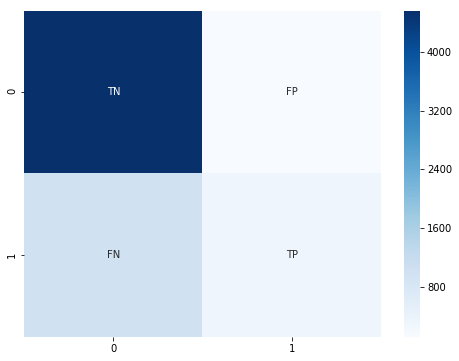

In [7]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(ytest, y_pred_test)
print('Confussion Matrix from the test data')
print(cf_matrix)

labels = ['TN','FP','FN','TP']
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

### Observations from the confussion matrix above
- A confussion matrix is used to measure the performance of a machine learning classifcation model. Also known as the error matrix brings out the visualization of the performance of a classification model.
- From the visualizations above, there are four different sections with different with statistics about the model performance on this data. 
- From a data set of 30000 entries(records), 20% was to test the model which makes a total of 6000 records. The model perfomance on this data therefore gives statistics of the predictions on the table above which is:  
- **4566 TN(True Negatives):** Records that were  predicted as non defaulted and they actually are
- **117 FP(False Positives):** Non defaulted cards but classified as defaulted
- **1006 FN(False Negatives):** Defaulted cards instead classififed under non defaulted cards. 
- **311 TP(True Positives):** Records that were predicted as defaulted when actually they cards were defaulted.
- TP and FP are assigned to the **Positive class**(Defaulted cards) while TN and FN are assigned to the **negative class**(Non defaulted cards)

In [8]:
# Classification report for Logistic regression with L1 regularization

from sklearn.metrics import classification_report

print("[Training Classification Report:]")
print(classification_report(ytrain, y_pred_train))

print("[Test Classification Report:]")
print(classification_report(y_pred_test, ytest))

[Training Classification Report:]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89     18681
           1       0.71      0.24      0.36      5319

    accuracy                           0.81     24000
   macro avg       0.76      0.61      0.62     24000
weighted avg       0.79      0.81      0.77     24000

[Test Classification Report:]
              precision    recall  f1-score   support

           0       0.98      0.82      0.89      5572
           1       0.24      0.73      0.36       428

    accuracy                           0.81      6000
   macro avg       0.61      0.77      0.62      6000
weighted avg       0.92      0.81      0.85      6000



### Classification Report
A classification report is used to measure the efficiency of a classification model by printing out on a table howmany predictions are true and howmany are false.
 - **Precision** is the ability of this model not to lable a record positive(defaulted card) whereas it is actually negative(non defaulted card).
 - **Recall** This is the ability of this model to find all positive instances. Positive instances is a sum of True Negative(TN) and False Negative(FN)
 - **F1 score** is the weighted harmonic mean of precision and recall where the best score is 1.0 and the worst is 0. This cannot be compared to model accuracy as it adds up the recall and precision during it's computation. 

In [9]:
# Importing DecisionTree classifier from sklearn.
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=300, max_depth=10, random_state=0)
clf_dt.fit(Xtrain, ytrain)


ypred_dt = clf_dt.predict(Xtrain)
print('[Train] Accuracy score using Decision Tree Model with parameter tuning is: ', round(accuracy_score(ytrain, ypred_dt), 4))
      
ypred_dt2 = clf_dt.predict(Xtest)
print('[Test] Accuracy score using Decision Tree Model with parameter tuning is: ', round(accuracy_score(ypred_dt2, ytest), 4))

[Train] Accuracy score using Decision Tree Model with parameter tuning is:  0.8247
[Test] Accuracy score using Decision Tree Model with parameter tuning is:  0.8177


[[4449  234]
 [ 860  457]]


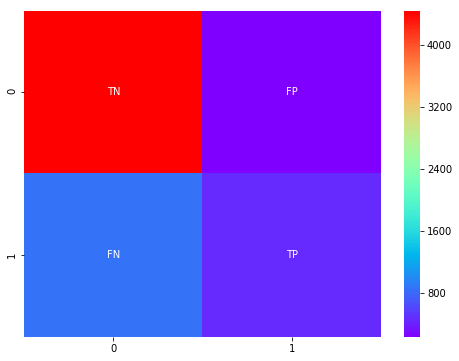

In [10]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(ytest, ypred_dt2)
print(cf_matrix)

labels = ['TN','FP','FN','TP']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='rainbow')


In [11]:
# Classification report for Decision tree with hyperparameter tuning

print("[Training Classification Report:]")
print(classification_report(ytrain, ypred_dt))

print("[Test Classification Report:]")
print(classification_report(ypred_dt2, ytest))

[Training Classification Report:]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89     18681
           1       0.69      0.38      0.49      5319

    accuracy                           0.82     24000
   macro avg       0.77      0.66      0.69     24000
weighted avg       0.81      0.82      0.80     24000

[Test Classification Report:]
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      5309
           1       0.35      0.66      0.46       691

    accuracy                           0.82      6000
   macro avg       0.65      0.75      0.67      6000
weighted avg       0.88      0.82      0.84      6000



### Calibration Plots for both models

In [12]:
# Calibration plots for Logistic regression

log_prediction = clf_lr.predict_proba(Xtest)
# Gives probabilities of the target(0 and 1) in the form of an array. For Logistic regression with regularization

dt_prediction = clf_dt.predict_proba(Xtest)
# Probabilities of the target for Decision tree

# print out of probability predictions from logistic regression
log_prediction[:5]

array([[0.92581196, 0.07418804],
       [0.57001289, 0.42998711],
       [0.93351451, 0.06648549],
       [0.94589442, 0.05410558],
       [0.78490406, 0.21509594]])

In [14]:
from sklearn.calibration import calibration_curve
# calibration curves for both models.
y_lr, x_lr = calibration_curve(ytest, log_prediction[:,1], n_bins=10)

dt_y, dt_x = calibration_curve(ytest, dt_prediction[:,1], n_bins=10)
# 10 bins each represent a point where X is the mean predicted probability.

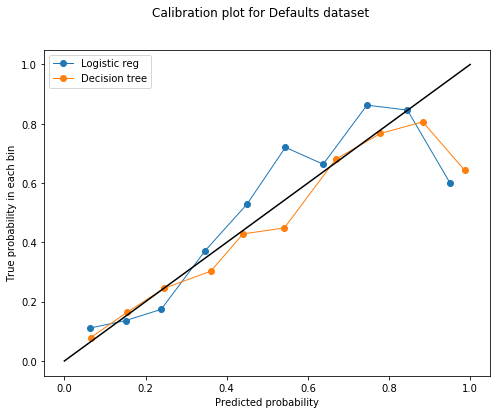

In [16]:
# Calibration plot for both models
fig, ax = plt.subplots()
# only these two lines are calibration curves
plt.plot(x_lr,y_lr, marker='o', linewidth=1, label='Logistic reg')
plt.plot(dt_x, dt_y, marker='o', linewidth=1, label='Decision tree')

# Perfectly calibrated line
plt.plot([0, 1], [0, 1], color='black')

# legends, and axis labels
fig.suptitle('Calibration plot for Defaults dataset')
ax.set_xlabel('Predicted probability')
ax.set_ylabel('True probability in each bin')
plt.legend()
plt.show()

### Observations from above.
 - The decision tree model has probabilities very close to the perfectly calibrated line as the bin probabilities are very close to this line.This show the decision tree model will produce good predictions from any data used.
 - For the Logistic regression model, some bins have really high prediction probabilitites deviatng from the perfectly calibrated line. This shows using this logistic regression for this data won't produce optimal solution.

## Conclussion
Decision tree model with hyperparameer tuning is therefore the best model for this case. Since the model after training and test has produced high accuracy values from the accuracy score and also it is good in overrall results with little distribution assesment errors. This model will therefore predict either a 0 (non defaulted cards) and 1 (defaulted cards) with high accuracy values.